In [0]:
# 1.1 Import tensorflow and other libraries.
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

In [0]:
##def my_function(x):
  ##return (200/(x+3.5)-2)*x

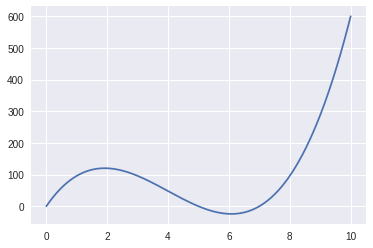

In [120]:
# 1.2 Create input data using NumPy. y = x * 0.1 + 0.3 + noise
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

x = np.linspace(0,10.0,num=1000)
y= x*(14-2*x)*(10-2*x)

# Uncomment the following line to plot our input data.
pylab.plot(x, y)

In [121]:

x = tf.Variable(tf.random_uniform([1], 0, 2))


# Uncomment the following lines to see W and b are.
print(x)
# print(b)

<tf.Variable 'Variable_7:0' shape=(1,) dtype=float32_ref>


In [0]:
# 1.4 Build training graph.
loss = tf.reduce_mean(x*(14-2*x)*(10-2*x))  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(-0.01)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.
init = tf.initialize_all_variables()  # Create an operation initializes all the variables.

# Uncomment the following 3 lines to see what 'loss', 'optimizer' and 'train' are.
# print("loss:", loss)
# print("optimizer:", optimizer)
# print("train:", train)
# print(init)

In [0]:
# 1.5 Uncomment the following line to see what we have built.
 #print(tf.get_default_graph().as_graph_def())

In [124]:
# 1.6 Create a session and launch the graph.
sess = tf.Session()
sess.run(init)
#y_initial_values = sess.run(W)  # Save initial values for plotting later.

# Uncomment the following line to see the initial W and b values.
print(sess.run([x]))

[array([1.1817622], dtype=float32)]


In [125]:
# 1.7 Perform training.
for step in range(1000):
    sess.run(train)
    # Uncomment the following two lines to watch training happen real time.
print(sess.run([x]))

[array([1.9183339], dtype=float32)]


In [126]:
import numpy as np

import multiprocessing
from collections import OrderedDict
import os
import time


def eval_iter(arg_lst, l_lst):
    for c_i, args in enumerate(arg_lst):
        yield c_i, args, l_lst


def eval_func(c_i, args, l_lst):
    assert len(args) == 3
    x = args[0]
    y = args[1]
    z = args[2]
    res = x*y + (z*(x+2)*(y+3.5) -200)
    print(f"Eval {x}, {y}, {z}: {res}")
    l_lst[c_i] = res


if __name__ == '__main__':

    generation_num = 10
    child_num = 5

    space = OrderedDict((
        ('x', (-2., 0.)),
        ('y', (0., 2.)),
        ('z', (10., 11.))
    ))

    params = OrderedDict([(nm, []) for nm in space.keys()])
    for nm, v_range in space.items():
        params[nm] = np.random.uniform(v_range[0], v_range[1], size=child_num)

    arg_list = []
    for c_n in range(child_num):
        arg_list.append([val[c_n] for val in params.values()])

    manager = multiprocessing.Manager()
    loss_lst = manager.list([np.inf for i in range(child_num)])

    for r_n in range(generation_num):
        with multiprocessing.Pool(os.cpu_count()) as pool:
            pool.starmap(eval_func, eval_iter(arg_list, loss_lst))

        fittest_idx = int(np.argmin(loss_lst))
        base_args = arg_list[fittest_idx]
        print(f"Best {base_args}\n")

        # mutate offspring from fittest individual
        params = OrderedDict([(nm, []) for nm in space.keys()])
        for s_i, (nm, v_range) in enumerate(space.items()):
            std = (v_range[1] - v_range[0]) / 2
            noise = np.random.normal(0, std, size=child_num)
            new_param = base_args[s_i] + noise
            params[nm] = np.clip(new_param, v_range[0], v_range[1])

        arg_list = []
        for c_n in range(child_num):
            arg_list.append([val[c_n] for val in params.values()])

        loss_lst = manager.list([np.inf for i in range(child_num)])

Eval -1.1792940726054488, 1.1471814568056111, 10.946182181148847: -159.6044607646633
Eval -0.5157602389245457, 1.3715748190775305, 10.089819504238067: -127.75210573696141
Eval -0.9594005208222554, 1.563660144207104, 10.649004867385965: -145.38799149274809
Eval -0.1611691565751927, 0.8410989514193348, 10.508883121626361: -116.24790949044588
Eval -1.4716786614701112, 1.0800303339687178, 10.863512704912539: -175.3027143705334
Best [-1.4716786614701112, 1.0800303339687178, 10.863512704912539]

Eval -0.7232847827266331, 1.27388238118169, 11.0: -133.87760864448563
Eval -1.9309623389651436, 1.7466561091051018, 10.662272291106795: -199.51067231179564
Eval -2.0, 1.3199966729117734, 11.0: -202.63999334582354
Eval -2.0, 0.649975912525374, 11.0: -201.29995182505075
Eval -1.2852859943903359, 0.6413285023719967, 10.588781585663302: -169.48292142502228
Best [-2.0, 1.3199966729117734, 11.0]

Eval -2.0, 0.9124544521009383, 10.966517825352518: -201.8249089042019
Eval -2.0, 0.960635426894368, 10.70709000